<a href="https://colab.research.google.com/github/raheem7348/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/heart_disease_data.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df['target'].value_counts()

,count
target,
1,164
0,138


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


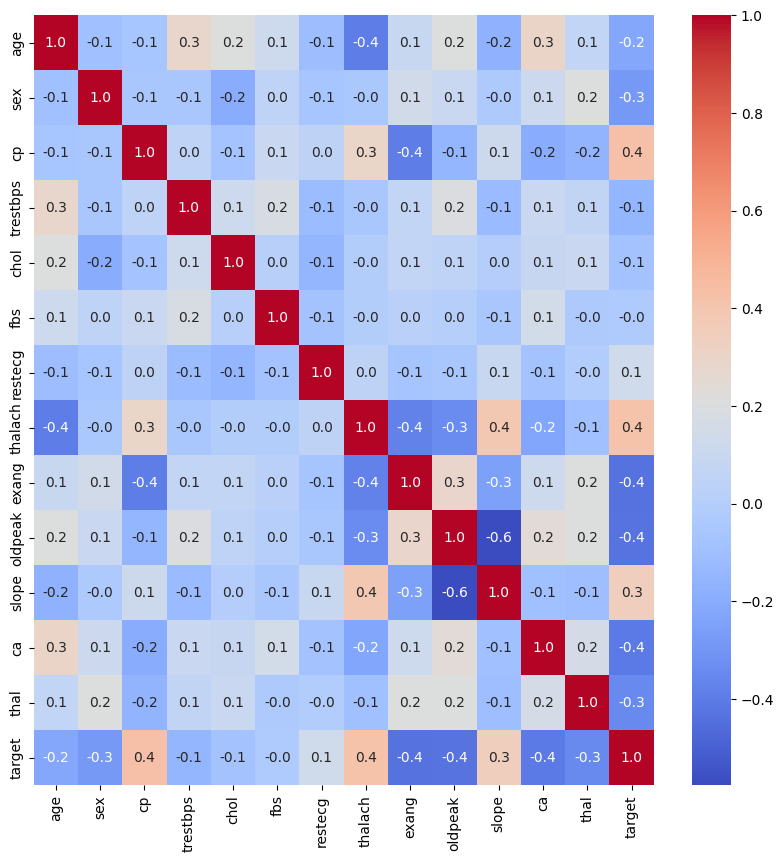

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt = '.1f', cmap='coolwarm')
plt.show()

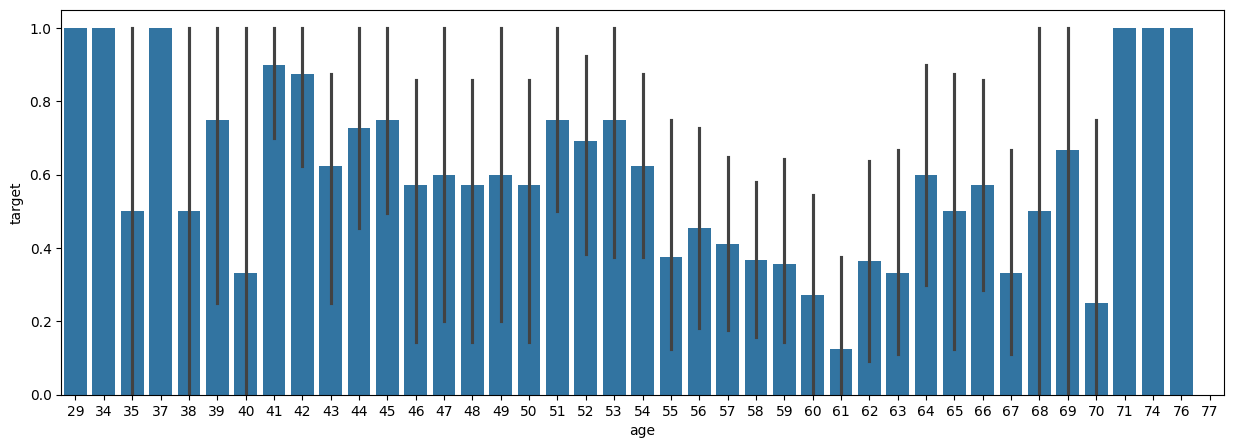

In [12]:
plot = plt.figure(figsize=(15,5))
sns.barplot(x = 'age', y = 'target', data = df)
plt.show()

splitting the feature

In [13]:
x= df.drop(columns = 'target', axis = 1)
y = df['target']

In [14]:
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

splitting the train and test data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = 2)

In [17]:
print(x.shape, x_train.shape, x_test.shape)


(302, 13) (241, 13) (61, 13)


In [18]:
print(y.shape, y_train.shape, y_test.shape)

(302,) (241,) (61,)


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
sc.fit_transform(x_train)

array([[-0.17144621, -1.43200311, -0.92630688, ...,  0.96240779,
        -0.70610677, -0.50457099],
       [ 2.48001072,  0.6983225 , -0.92630688, ...,  0.96240779,
         2.33267415, -0.50457099],
       [ 0.38094065, -1.43200311, -0.92630688, ..., -0.67097445,
        -0.70610677, -0.50457099],
       ...,
       [ 1.48571437,  0.6983225 , -0.92630688, ..., -0.67097445,
         1.31974718,  1.18434025],
       [ 0.60189539,  0.6983225 ,  1.04056499, ..., -0.67097445,
        -0.70610677, -0.50457099],
       [-1.38669731,  0.6983225 ,  2.02400093, ...,  0.96240779,
         1.31974718, -0.50457099]])

In [22]:
sc.transform(x_test)

array([[-1.05526519,  0.6983225 , -0.92630688,  0.67359847,  1.17330569,
        -0.39831375, -0.99975595, -0.15077264,  1.44559455, -0.89719562,
        -0.67097445,  2.33267415,  1.18434025],
       [-2.82290314,  0.6983225 ,  0.05712906, -0.03581405, -0.79074144,
        -0.39831375, -0.99975595,  2.35989494, -0.6917569 , -0.89719562,
         0.96240779, -0.70610677, -0.50457099],
       [-0.28192358,  0.6983225 ,  2.02400093,  1.26477557,  0.96754837,
         2.51058366,  0.88259705,  1.2643309 , -0.6917569 ,  0.16751088,
        -0.67097445, -0.70610677,  1.18434025],
       [-0.06096884,  0.6983225 , -0.92630688, -0.50875573,  0.74308584,
        -0.39831375, -0.99975595, -1.56587619,  1.44559455,  1.94202171,
        -0.67097445,  1.31974718, -0.50457099],
       [-0.28192358,  0.6983225 ,  1.04056499,  0.43712763, -0.43534244,
        -0.39831375,  0.88259705,  0.85349439, -0.6917569 , -0.89719562,
         0.96240779,  3.34560113, -0.50457099],
       [ 1.48571437, -1.432003

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accu = accuracy_score(y_test, y_pred)

In [29]:
accu

0.819672131147541

Building a predictive System

In [30]:
input_data = (52,1,2,172,199,1,1,162,0,0.5,2,0,3)

#changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#changing the shape of input data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#  #scaling the input data
# sc_data = sc.transform(input_data_reshaped)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
   print('The person does not have heart disease')
else:
   print('The person has heart disease')




[1]
The person has heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
